<a href="https://colab.research.google.com/github/pritisharma098/CODSOFT_Task2/blob/main/Movie_rating_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Task: Movie Rating Prediction ***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
movie = pd.read_csv("movies.dat", sep="::", encoding="latin-1")
movie.columns =['MovieIDs','MovieName','Genre']
movie.dropna(inplace=True)
movie.head(5)

<ipython-input-2-ef09837a39fb>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  movie = pd.read_csv("movies.dat", sep="::", encoding="latin-1")


,MovieIDs,MovieName,Genre
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [3]:
movie.shape

(3882, 3)

In [4]:
movie.describe

<bound method NDFrame.describe of       MovieIDs                           MovieName  \
0            2                      Jumanji (1995)   
1            3             Grumpier Old Men (1995)   
2            4            Waiting to Exhale (1995)   
3            5  Father of the Bride Part II (1995)   
4            6                         Heat (1995)   
...        ...                                 ...   
3877      3948             Meet the Parents (2000)   
3878      3949          Requiem for a Dream (2000)   
3879      3950                    Tigerland (2000)   
3880      3951             Two Family House (2000)   
3881      3952               Contender, The (2000)   

                             Genre  
0     Adventure|Children's|Fantasy  
1                   Comedy|Romance  
2                     Comedy|Drama  
3                           Comedy  
4            Action|Crime|Thriller  
...                            ...  
3877                        Comedy  
3878                 

In [5]:
movie.isna().sum()

MovieIDs     0
MovieName    0
Genre        0
dtype: int64

In [6]:
rating=pd.read_csv("ratings.dat",sep="::", engine="python")
rating.columns =['ID','MovieID','Ratings','TimeStamp']
rating.dropna(inplace=True)
rating.head(10)

,ID,MovieID,Ratings,TimeStamp
0,1,661,3,978302109
1,1,914,3,978301968
2,1,3408,4,978300275
3,1,2355,5,978824291
4,1,1197,3,978302268
5,1,1287,5,978302039
6,1,2804,5,978300719
7,1,594,4,978302268
8,1,919,4,978301368
9,1,595,5,978824268


In [7]:
rating.shape

(1000208, 4)

In [8]:
rating.isna().sum()

ID           0
MovieID      0
Ratings      0
TimeStamp    0
dtype: int64

In [9]:
users=pd.read_csv("users.dat", sep="::",engine="python")
users.columns =['UserID','Gender','Age','Occupation','Zip-code']
users.dropna(inplace=True)
users.head(10)

,UserID,Gender,Age,Occupation,Zip-code
0,2,M,56,16,70072
1,3,M,25,15,55117
2,4,M,45,7,02460
3,5,M,25,20,55455
4,6,F,50,9,55117
5,7,M,35,1,06810
6,8,M,25,12,11413
7,9,M,25,17,61614
8,10,F,35,1,95370
9,11,F,25,1,04093


In [10]:
users.shape

(6039, 5)

In [11]:
users.isna().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [12]:
data=pd.concat([movie,rating,users], axis=1)
data.dropna()
data.head(10)

,MovieIDs,MovieName,Genre,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117
5,7.0,Sabrina (1995),Comedy|Romance,1,1287,5,978302039,7.0,M,35.0,1.0,06810
6,8.0,Tom and Huck (1995),Adventure|Children's,1,2804,5,978300719,8.0,M,25.0,12.0,11413
7,9.0,Sudden Death (1995),Action,1,594,4,978302268,9.0,M,25.0,17.0,61614
8,10.0,GoldenEye (1995),Action|Adventure|Thriller,1,919,4,978301368,10.0,F,35.0,1.0,95370
9,11.0,"American President, The (1995)",Comedy|Drama|Romance,1,595,5,978824268,11.0,F,25.0,1.0,04093


In [13]:
data.shape

(1000208, 12)

In [14]:
data.describe

<bound method NDFrame.describe of          MovieIDs                           MovieName  \
0             2.0                      Jumanji (1995)   
1             3.0             Grumpier Old Men (1995)   
2             4.0            Waiting to Exhale (1995)   
3             5.0  Father of the Bride Part II (1995)   
4             6.0                         Heat (1995)   
...           ...                                 ...   
1000203       NaN                                 NaN   
1000204       NaN                                 NaN   
1000205       NaN                                 NaN   
1000206       NaN                                 NaN   
1000207       NaN                                 NaN   

                                Genre    ID  MovieID  Ratings  TimeStamp  \
0        Adventure|Children's|Fantasy     1      661        3  978302109   
1                      Comedy|Romance     1      914        3  978301968   
2                        Comedy|Drama     1     3408 

Data Visualization

<Axes: xlabel='Gender', ylabel='count'>

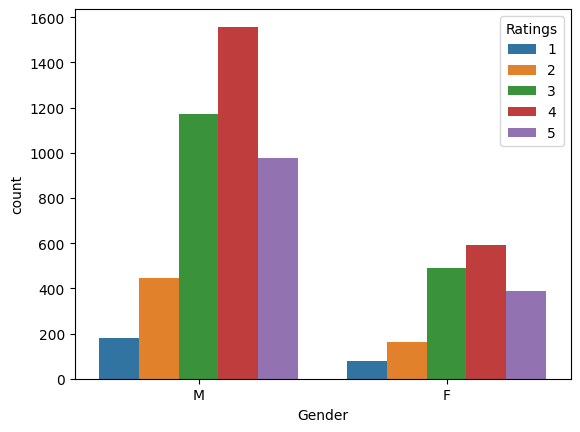

In [15]:
sns.countplot(x=data['Gender'],hue=data['Ratings'])

Text(0.5, 0, 'Ratings')

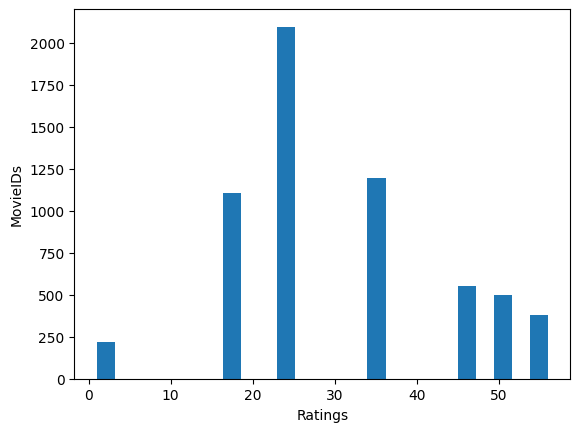

In [16]:
data.Age.plot.hist(bins=25)
plt.ylabel("MovieIDs")
plt.xlabel("Ratings")

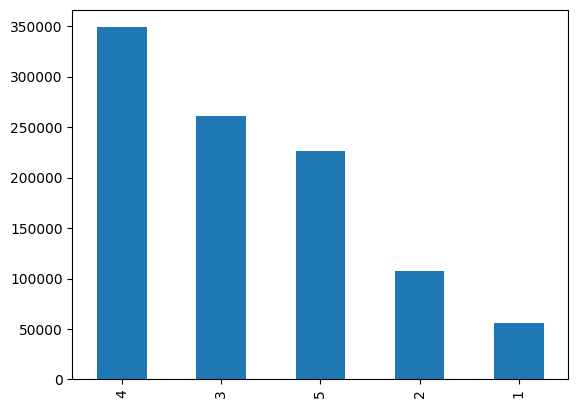

In [17]:
data["Ratings"].value_counts().plot(kind="bar")
plt.show()

Text(0, 0.5, 'Ratings')

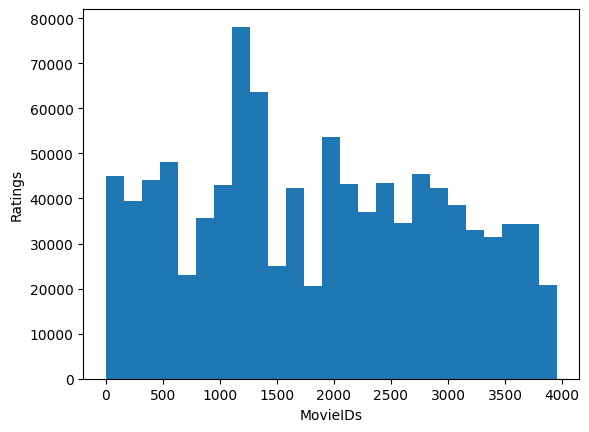

In [18]:
data['MovieID'].plot.hist(bins=25)
plt.xlabel("MovieIDs")
plt.ylabel("Ratings")

<Axes: ylabel='Frequency'>

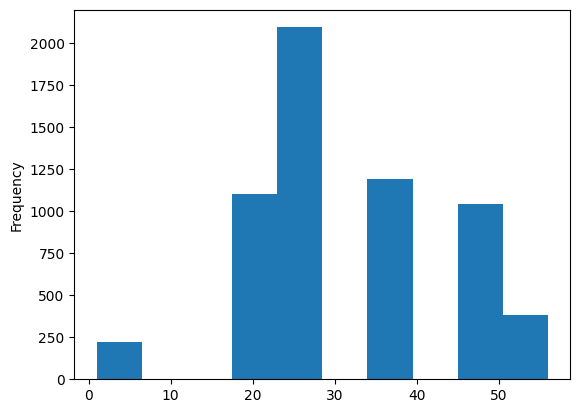

In [19]:
data['Age'].plot.hist(bins=10)
#plt.xlabel("Ratings")
#plt.ylabel("Age")

<Axes: xlabel='Age', ylabel='count'>

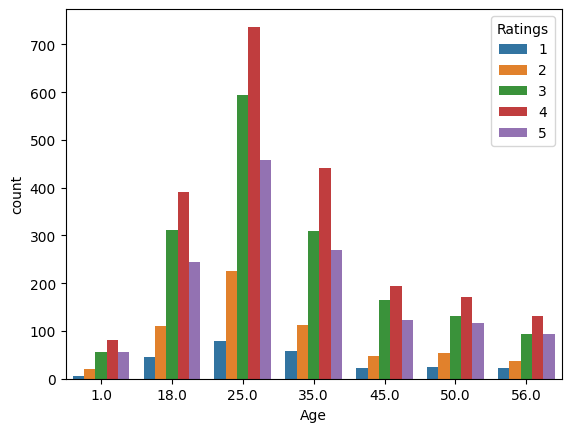

In [20]:
sns.countplot(x=data['Age'],hue=data['Ratings'])

Fianl dataset

In [21]:
data.head()

,MovieIDs,MovieName,Genre,ID,MovieID,Ratings,TimeStamp,UserID,Gender,Age,Occupation,Zip-code
0,2.0,Jumanji (1995),Adventure|Children's|Fantasy,1,661,3,978302109,2.0,M,56.0,16.0,70072
1,3.0,Grumpier Old Men (1995),Comedy|Romance,1,914,3,978301968,3.0,M,25.0,15.0,55117
2,4.0,Waiting to Exhale (1995),Comedy|Drama,1,3408,4,978300275,4.0,M,45.0,7.0,02460
3,5.0,Father of the Bride Part II (1995),Comedy,1,2355,5,978824291,5.0,M,25.0,20.0,55455
4,6.0,Heat (1995),Action|Crime|Thriller,1,1197,3,978302268,6.0,F,50.0,9.0,55117
